This source code is related to the Handbook of Quenchants and Quenching Technology (ASM International)
The mathematical model of Heat Transfer is represented in the chapter
Heat Transfer during Quenching Processes (Solving method for heat conduction equation)

The Heat Transfer model of a cylindrical solid object is considered. Due to the symmetry of the object, the temopro-spatial distribution of temperature at the half of the cross section of the cylinder is calculated. Therefore, we are using a 1D axis-symmetrical model.

The transient heat transfer during quenching can mathematically be described by an appropriate form of a Fourier’s heat conduction equation (Eq.2). For the 1D axis-symmetrical model, the (Eq.8) was taken into account. The solution of (Eq.8) is obtained by the Finite Difference Method (FDM).


## Requirements

This Python code requires the [Numpy](https://numpy.org/) (for the computing), [Pandas](https://pandas.pydata.org/) (for analyzing the results) [Matplotlib](https://matplotlib.org/stable/index.html) and [Seaborn](https://seaborn.pydata.org/) (for visualization) modules. As for running the model, only NumPy is required. 

Installing with pip

```
pip install numpy pandas seaborn matplotlib
```

or using Anaconda

```
conda install numpy pandas seaborn matplotlib

```

In [3]:
import numpy as np

## Inicializing the variables

The variables and constants ar the followings:

| variable          | meaning                                              |
|-------------------|------------------------------------------------------|
| `nn`              | The number of the local coordinate nodes             |
| `radius`          | The radius of the cylindrical object (s)             |
| `htc`             | The value of Heat Transfer Coefficient (Wm-2k-1)     |
| `t_start`         | The starting temperature (C))                        |
| `t_quenchant`     | The temperature of the quenchant (C)                 |
| `time_`           | The time elapsed (s)                                 |
| `dt`              | The time step (s)                                    |
| `dx`              | The space interval between the local coordinates (m) |
| `k`               | The heat conductivity  (Wm-1K-1)                     |
| `cp`              | The specific heat (JKg-1K-1)                         |
| `rho`             | The density in (Kgm-3)                               |
| `alpha`           | The thermal diffusivity (Jm-3K-1)                    |
| `temperature_vec` | The vector of recent temperature distribution at the half cross section of the cylinder  |
| `exchange_vec`    | The vector for former temperature distribution at the half cross section of the cylinder |

In [5]:
nn: int = 10
radius: float = 0.01

htc: float = 100
t_start: float = 850
t_quenchant: float = 20

dx: float = radius / nn
dt: float = 0.01
time_: float = 0


# Materials Data
k: float = 27
cp: float = 485
rho: float = 7850
alpha = k / (cp * rho)


temperature_vec = np.arange(nn + 1, dtype=float)
exchange_vec = np.arange(nn + 1, dtype=float)

# Initialization of start temperature
temperature_vec.fill(t_start)
exchange_vec.fill(t_start)

In [7]:
iterations = []
for j in range(0, 6000):
    for i in range(1, nn):
        temperature_vec[i] = exchange_vec[i] + dt * alpha * (1 / (dx*dx) * (exchange_vec[i-1] + exchange_vec[i+1] - 2 * exchange_vec[i]) + 1 / (i*dx) * 1 / (2*dx) * (exchange_vec[i+1] - exchange_vec[i-1]))
    temperature_vec[0] = exchange_vec[0] + dt * alpha * (1 / (dx * dx) * 2 * (exchange_vec[1] - exchange_vec[0]))
    temperature_vec[nn] = exchange_vec[nn] + dt * alpha * (1 / (dx * dx) * 2 * (exchange_vec[nn - 1] - exchange_vec[nn] - dx / k * (htc * (exchange_vec[nn] - t_quenchant))) + 1 / (nn * dx) * (-1 / k) * (htc * (exchange_vec[nn] - t_quenchant)))

    time_ = time_ + dt
    exchange_vec = temperature_vec

    str_temperature = ''
    for ii in range(nn+1):
        str_temp_round = round(temperature_vec[ii], 2)
        str_temperature = str_temperature + ' ' + str(str_temp_round)
    str_temperature = str_temperature + '\n'
    iterations.append([round(i, 2) for i in temperature_vec[:-1]])

The results of the iterations are collected in the `iterations` list. Convert it to a Pandas DataFrame.

In [10]:
import pandas as pd

df = pd.DataFrame.from_records(iterations)
# add names for the columns
df.columns = [f"node_{i}" for i in range(1, nn+1)]
# optionally, save the result as CSV
#df.to_csv("result.csv", index=False)
df

,node_1,node_2,node_3,node_4,node_5,node_6,node_7,node_8,node_9,node_10
0,850.00,850.00,850.00,850.00,850.00,850.00,850.00,850.00,850.00,849.97
1,850.00,850.00,850.00,850.00,850.00,850.00,850.00,850.00,850.00,849.91
2,850.00,850.00,850.00,850.00,850.00,850.00,850.00,850.00,849.99,849.83
3,850.00,850.00,850.00,850.00,850.00,850.00,850.00,850.00,849.98,849.74
4,850.00,850.00,850.00,850.00,850.00,850.00,850.00,850.00,849.96,849.64
...,...,...,...,...,...,...,...,...,...,...
5995,619.45,619.25,618.86,618.28,617.48,616.46,615.23,613.79,612.13,610.25
5996,619.42,619.21,618.83,618.24,617.45,616.43,615.20,613.76,612.10,610.22
5997,619.38,619.18,618.80,618.21,617.41,616.40,615.17,613.72,612.06,610.19
5998,619.35,619.15,618.76,618.18,617.38,616.36,615.13,613.69,612.03,610.16


## Visualization

As the data is in a Pandas DataFrame, all of its function can be used. Let's see the cooling curve of the *node 9*.

<AxesSubplot:>

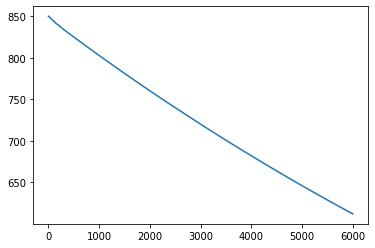

In [13]:
df["node_9"].plot()

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

Plot every 50th iteration (to reduce the drawing time) as a heatmap.

<AxesSubplot:>

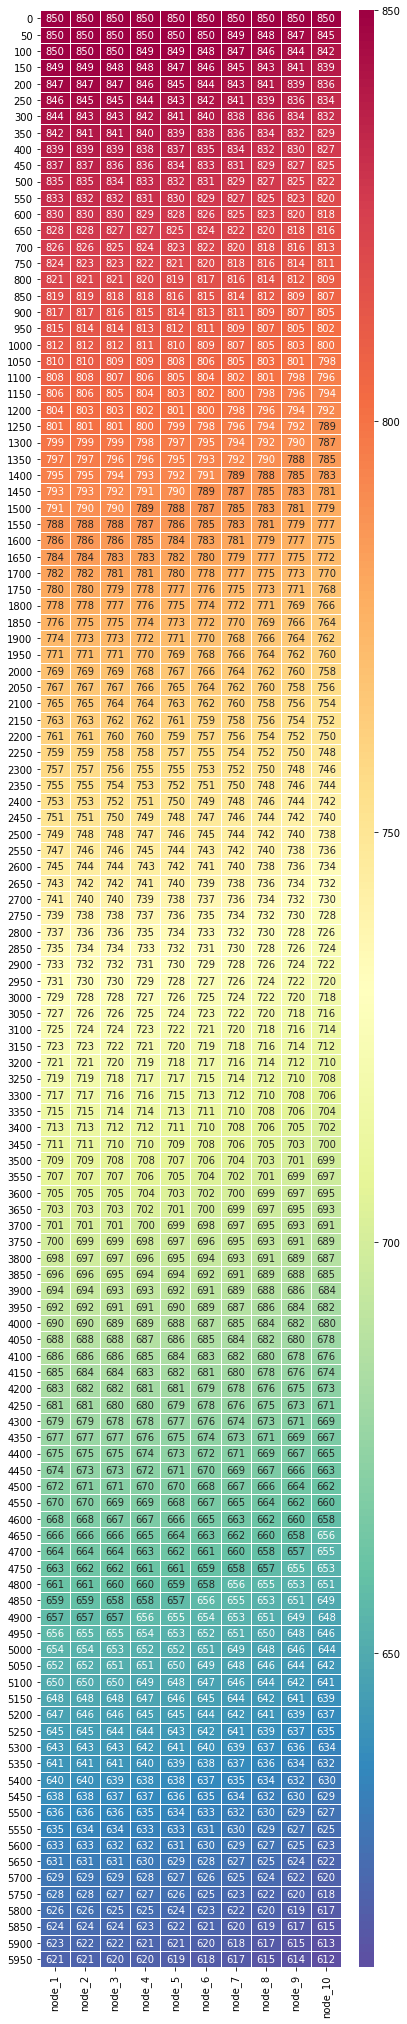

In [33]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(6, 36))
divider = make_axes_locatable(ax)
cbar_ax = divider.new_horizontal(size="5%", pad=0.25, pack_start=False)
fig.add_axes(cbar_ax)

sns.heatmap(df[::50], cmap="Spectral_r", annot=True, fmt="0.0f", linewidths=.5, ax=ax, cbar_ax=cbar_ax)